# Three attributes game

Each action has 3 numerical atributes.  The three attributes are ranked for tiebreaking.  You win if your action is greater than the opponent's action in 2 out of 3 attributes.  In case that one attribute is tied, the tie is broken based on the rank of the winning attribute.

In the following, consider 3 non-negative integer attributes, each of which takes values {0, 1, 2, 3}.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# get all integer vectors with entries {0, ..., 4}
temp = np.ones((5, 5, 5))
vectors = np.array(np.nonzero(temp)).T
# restrict to vectors with sums in {3, .., 6}
sums = np.sum(vectors, 1)
vectors = vectors[np.logical_and(sums >= 3, sums <= 6)]
vectors

array([[0, 0, 3],
       [0, 0, 4],
       [0, 1, 2],
       [0, 1, 3],
       [0, 1, 4],
       [0, 2, 1],
       [0, 2, 2],
       [0, 2, 3],
       [0, 2, 4],
       [0, 3, 0],
       [0, 3, 1],
       [0, 3, 2],
       [0, 3, 3],
       [0, 4, 0],
       [0, 4, 1],
       [0, 4, 2],
       [1, 0, 2],
       [1, 0, 3],
       [1, 0, 4],
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 3],
       [1, 1, 4],
       [1, 2, 0],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 3],
       [1, 3, 0],
       [1, 3, 1],
       [1, 3, 2],
       [1, 4, 0],
       [1, 4, 1],
       [2, 0, 1],
       [2, 0, 2],
       [2, 0, 3],
       [2, 0, 4],
       [2, 1, 0],
       [2, 1, 1],
       [2, 1, 2],
       [2, 1, 3],
       [2, 2, 0],
       [2, 2, 1],
       [2, 2, 2],
       [2, 3, 0],
       [2, 3, 1],
       [2, 4, 0],
       [3, 0, 0],
       [3, 0, 1],
       [3, 0, 2],
       [3, 0, 3],
       [3, 1, 0],
       [3, 1, 1],
       [3, 1, 2],
       [3, 2, 0],
       [3, 2, 1],
       [3,

In [3]:
# compute payoff sign matrix
a0_dom = np.sign(vectors[:, [0]] - vectors[:, [0]].T)
a1_dom = np.sign(vectors[:, [1]] - vectors[:, [1]].T)
a2_dom = np.sign(vectors[:, [2]] - vectors[:, [2]].T)

scores = 4 * (a0_dom > 0).astype(int) + 3 * (a1_dom > 0).astype(int) + 2 * (a2_dom > 0).astype(int)
win_mat = (scores > scores.T).astype(int)
p_sign = win_mat - win_mat.T



In [4]:
flag = True
# delete strictly dominating or dominant vectors
while flag:
    to_delete = np.logical_or(np.sum(p_sign == 1, 1) == 0, np.sum(p_sign == -1, 1) == 0)
    print(vectors[to_delete])
    vectors = vectors[~to_delete]
    p_sign = p_sign[~to_delete, :][:, ~to_delete]
    flag = (np.sum(to_delete) > 0)

[[0 0 3]]
[[0 0 4]]
[]


In [5]:
# check a few entries manually
i = 3
j = 5
print(vectors[[i, j], :])
p_sign[i, j]

[[0 2 1]
 [0 2 3]]


-1

In [6]:
# function to form payoff matrix from signs and rewards
def form_payoff(p_sign, rewards):
    payoff = np.dot(np.diag(rewards), (p_sign==1))
    payoff = payoff - payoff.T
    return payoff

In [7]:
# tune rewards
n = len(vectors)
# desired nash equilibrium
target_p = np.ones(n)/n

def tune_rewards(p_sign, target_p, learning_rate = 0.002, n_iterations = 50000):
    # uniform rewards to begin
    rewards = np.ones(len(p_sign))
    # determine values of strategies
    # decrease the rewards of high-value strategies and increase the rewards of low-value strategies
    all_rewards = []
    all_values = []

    for iter_no in range(n_iterations):
        all_rewards.append(rewards)
        payoff = form_payoff(p_sign, rewards)
        values = np.dot(payoff, target_p)
        all_values.append(values)
        rewards = rewards - learning_rate * values

    all_rewards = np.array(all_rewards)
    all_values = np.array(all_values)
    return rewards, values, all_rewards, all_values

In [8]:
rewards, values, all_rewards, all_values = tune_rewards(p_sign, target_p)

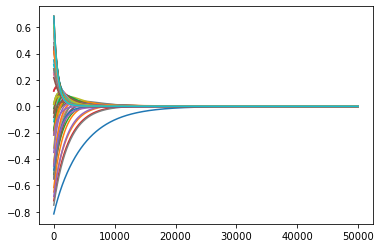

In [9]:
plt.plot(all_values)
plt.show()

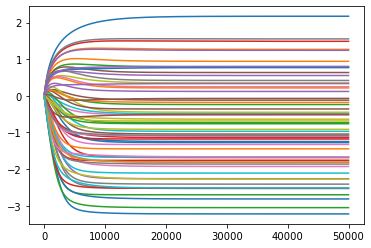

In [10]:
plt.plot(np.log(all_rewards))
plt.show()

In [11]:
np.sort(rewards)

array([0.03974634, 0.04718803, 0.05981377, 0.06706528, 0.07962625,
       0.08005511, 0.08067273, 0.08960286, 0.10278518, 0.1039539 ,
       0.12114582, 0.14508143, 0.15504062, 0.16290468, 0.16356933,
       0.17208717, 0.18512037, 0.18781828, 0.18899647, 0.23506906,
       0.26481774, 0.27868865, 0.2869832 , 0.30718893, 0.31824431,
       0.331536  , 0.33793768, 0.35160163, 0.37891701, 0.40004778,
       0.46606432, 0.48050528, 0.50328319, 0.52778515, 0.5913864 ,
       0.60215175, 0.60990918, 0.63801326, 0.69806689, 0.78766083,
       0.83444868, 0.88753067, 0.9312655 , 1.12601438, 1.24010083,
       1.2795605 , 1.39648841, 1.42153335, 1.51996713, 1.74053456,
       1.88809981, 2.1591776 , 2.20135913, 2.23155939, 2.56444772,
       3.46234068, 3.55297912, 4.42740807, 4.72744042, 8.77961216])

In [12]:
np.sort(rewards/np.min(rewards))

array([  1.        ,   1.18722958,   1.50488758,   1.68733235,
         2.00336065,   2.0141507 ,   2.02968973,   2.25436781,
         2.58602901,   2.61543344,   3.04797438,   3.65018376,
         3.90075246,   4.09860868,   4.11533086,   4.32963588,
         4.65754552,   4.72542373,   4.75506645,   5.91423209,
         6.66269562,   7.01168148,   7.22036864,   7.72873574,
         8.00688396,   8.34129696,   8.50236029,   8.84613917,
         9.533382  ,  10.06502268,  11.72596925,  12.08929713,
        12.66237933,  13.27883764,  14.87901635,  15.14986791,
        15.34504135,  16.05212727,  17.56304976,  19.81719303,
        20.99435429,  22.32987343,  23.43022197,  28.33001657,
        31.20038041,  32.19316799,  35.13502172,  35.76514121,
        38.2416908 ,  43.79106839,  47.50374392,  54.32393951,
        55.38520787,  56.14503296,  64.52035392,  87.1109377 ,
        89.39136022, 111.39160032, 118.94027964, 220.89110222])

In [13]:
# Select a subset with intermediate rewards
subset = np.logical_and(rewards > 1.0, rewards < 4.0)
np.sum(subset)

14

In [14]:
vectors_sub = vectors[subset, :]
p_sign_sub = p_sign[subset, :][:, subset]
rewards, values, all_rewards, all_values = tune_rewards(p_sign_sub, np.ones(len(p_sign_sub))/len(p_sign_sub))

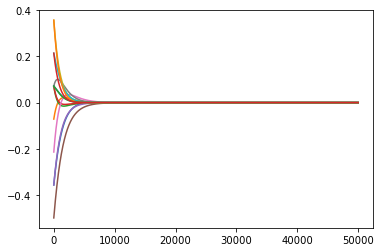

In [15]:
plt.plot(all_values)
plt.show()

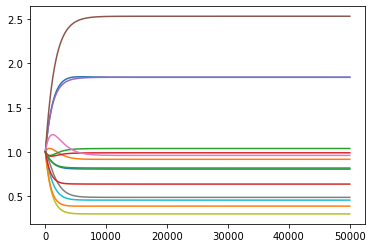

In [16]:
plt.plot(all_rewards)
plt.show()

In [17]:
# discretize rewards
d_rewards = np.floor(rewards/np.min(rewards) * 1)
probs = np.ones(len(p_sign_sub))/len(p_sign_sub)
payoff = form_payoff(p_sign_sub, d_rewards)
np.max(d_rewards)

8.0

In [18]:
def evolve_strategy(payoff, probs, learning_rate = 0.0005, n_iterations = 1000000):

    all_probs = []
    all_values = []

    for iter_no in range(n_iterations):
        all_probs.append(probs)
        #probs = np.mean(all_probs, 0)
        #print(probs)
        values = np.dot(payoff, probs)
        all_values.append(values)
        probs = probs * (1 + learning_rate * values)
        probs = probs/np.sum(probs)

    all_probs = np.array(all_probs)
    all_values = np.array(all_values)
    probs = np.mean(all_probs[int(n_iterations/2):, :], 0)
    values = np.dot(payoff, probs)
    return probs, values, all_probs, all_values

In [19]:
probs, values, all_probs, all_values = evolve_strategy(payoff, probs, 0.0001, 1000000)

In [20]:
np.max(values), np.min(values)

(0.03596976840610289, -0.34022873989471575)

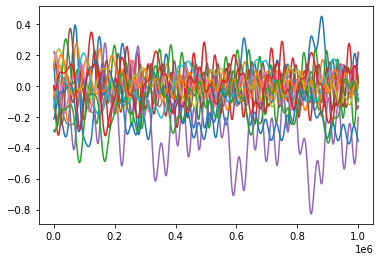

In [21]:
plt.plot(all_values)
plt.show()

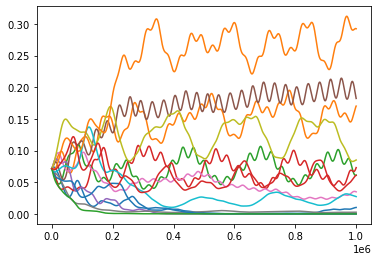

In [22]:
plt.plot(all_probs)
plt.show()

In [23]:
np.sum(probs > 0.01)

9

In [24]:
results = pd.DataFrame({
    'VP': d_rewards.astype(int), 
    'A0': vectors_sub[:, 0], 'A1': vectors_sub[:, 1], 'A2': vectors_sub[:, 2], 
    'total': np.sum(vectors_sub, 1),
    'prob': np.floor(probs* 1000)/10})
results.iloc[np.argsort(-probs)[:np.sum(probs > 0.01)], :].reset_index(drop = True)

,VP,A0,A1,A2,total,prob
0,1,2,1,0,3,26.9
1,8,1,0,2,3,18.7
2,3,0,1,4,5,15.6
3,1,1,1,1,3,12.6
4,3,0,2,2,4,7.2
5,3,0,3,1,4,6.8
6,2,4,0,0,4,5.5
7,3,1,0,3,4,3.5
8,1,1,2,0,3,2.2


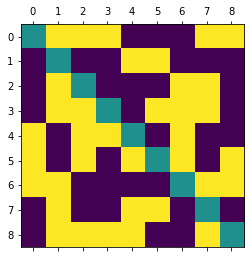

In [25]:
inds = np.argsort(-probs)[:np.sum(probs > 0.01)]
plt.matshow(p_sign_sub[inds, :][:, inds])